In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
data = pd.read_csv('/Users/shaneab/Projects/Machine Learning/Expression recognition/fer20131.csv')
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])
y = data['emotion'].values


In [6]:
# Normalize pixel values
X = X / 255.0

In [7]:
#Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.60646962, -0.4562069 , -0.4011047 , ..., -0.08714567,
        -0.05788751, -0.41197523],
       [ 0.37587539,  0.40796695,  0.41422283, ...,  1.03537587,
         0.88911749,  0.88301341],
       [ 1.34609268,  1.17337807,  0.52711433, ..., -0.3193915 ,
        -0.04509014,  0.47674246],
       ...,
       [-1.24923857, -1.23396336, -1.22897574, ...,  0.53217656,
         0.24924925, -0.01840025],
       [-1.09157826, -1.09816461, -1.07845373, ..., -1.00322646,
        -1.06887933, -1.09755746],
       [-1.22498314, -1.28334472, -1.25406274, ...,  0.98376568,
         1.09387532,  1.09884485]])

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train


array([[-1.40689888, -1.39445279, -1.37949774, ..., -1.41610795,
        -1.41440818, -1.41495663],
       [-1.09157826, -1.04878325, -0.91538822, ..., -0.06134058,
         0.03169404,  0.04507958],
       [ 1.588647  ,  1.58077431,  1.16683286, ..., -0.65485771,
        -1.42720554, -1.3133889 ],
       ...,
       [-0.27902128, -0.29571747, -0.66451821, ..., -0.39680678,
        -0.0962796 ,  0.60370213],
       [ 1.62503015,  1.37090352,  1.27972436, ...,  0.99666823,
         1.33702525,  1.39085209],
       [-0.01221153, -0.19695474, -1.20388874, ..., -1.45481559,
        -1.45280027, -1.45304453]])

In [9]:
# Grid Search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("Best Parameters:", knn_model.best_params_)

Best Parameters: {'n_neighbors': 1}


In [10]:
# Make Prediciton
best_knn = knn_model.best_estimator_
best_knn
y_pred = best_knn.predict(X_test)
y_pred

array([3, 3, 6, ..., 3, 0, 3])

In [11]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.41460016717748677
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36       985
           1       0.34      0.58      0.43       102
           2       0.42      0.41      0.42      1043
           3       0.47      0.44      0.45      1765
           4       0.36      0.33      0.34      1210
           5       0.59      0.56      0.57       795
           6       0.33      0.42      0.37      1278

    accuracy                           0.41      7178
   macro avg       0.42      0.44      0.42      7178
weighted avg       0.42      0.41      0.42      7178



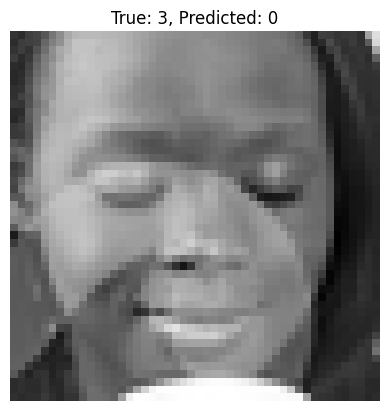

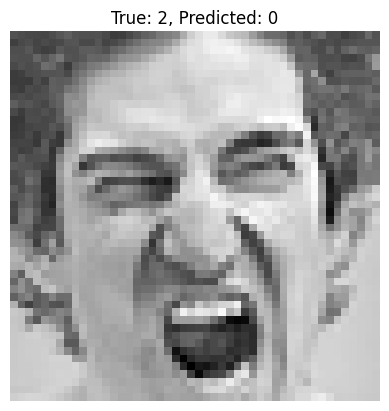

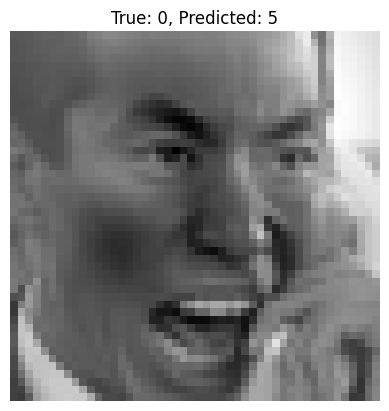

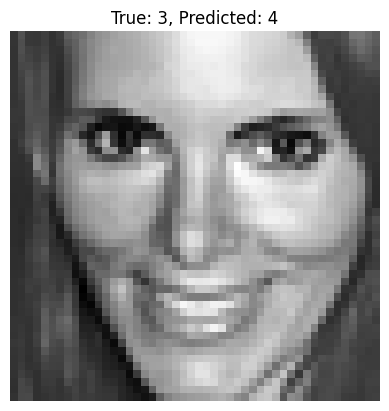

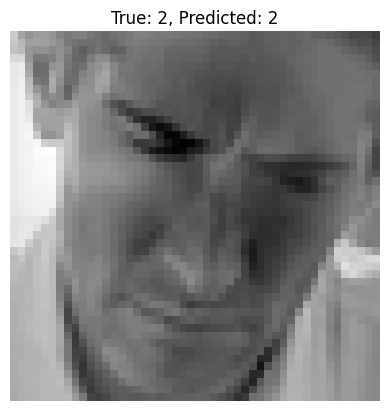

In [12]:
# Visualize random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx].reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()